# Import Libraries

In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.utils import plot_model
import numpy as np
from IPython.display import Image
from absl import logging
logging._warn_preinit_stderr = 0

Using TensorFlow backend.


# Define Inputs

In [2]:
# define input sequences for two instances with nine timesteps and two features
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# reshape input into [samples, time_steps, features]
samples = 2
time_steps = int(len(sequence)/2)
features = 1
sequence = sequence.reshape((samples, time_steps, features))
sequence

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]],

       [[1. ],
        [2. ],
        [3. ],
        [4. ],
        [5. ],
        [6. ],
        [7. ],
        [8. ],
        [9. ]]])

# Define Architecture

In [3]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps,1)))
model.add(RepeatVector(time_steps))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

W0805 19:07:33.061158  9936 deprecation_wrapper.py:119] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 19:07:33.077160  9936 deprecation_wrapper.py:119] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 19:07:33.080160  9936 deprecation_wrapper.py:119] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 19:07:33.430195  9936 deprecation_wrapper.py:119] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.tr

# Shwo the Architecture

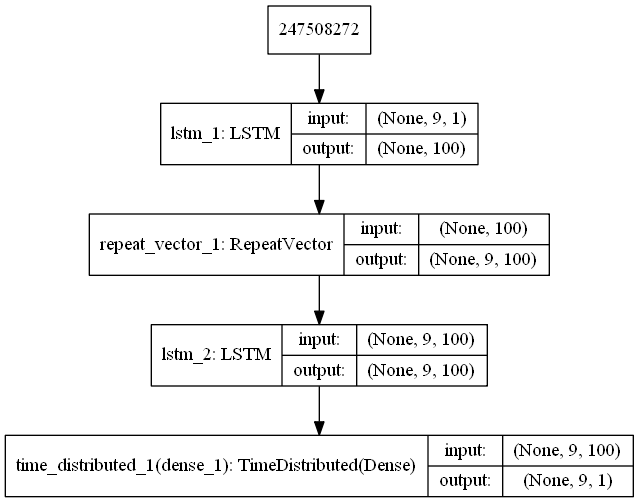

In [4]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
Image("reconstruct_lstm_autoencoder.png")

# Fit the model

In [5]:
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

W0805 19:07:33.729225  9936 deprecation.py:323] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 19:07:34.476300  9936 deprecation_wrapper.py:119] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0805 19:07:34.553308  9936 deprecation_wrapper.py:119] From C:\Users\basharm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



# Show the prediction

In [6]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[:,:,:])

[[[0.14235656]
  [0.23500796]
  [0.32317504]
  [0.41043055]
  [0.4987656 ]
  [0.59031075]
  [0.68736523]
  [0.79290855]
  [0.91068226]]

 [[1.025559  ]
  [1.9982835 ]
  [2.9770007 ]
  [3.9852328 ]
  [5.009533  ]
  [6.020716  ]
  [6.9876475 ]
  [8.002984  ]
  [8.998407  ]]]
